In [1]:
import numpy as np
import pandas as pd
import gzip
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

/Users/zuck016/.pyenv/versions/anaconda3-2020.11/envs/idp_new/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/normalized_targeted_enzyme_activities.csv',index_col=0)
#columns = [col.split('-') for col in df.columns]
#df.columns = pd.MultiIndex.from_tuples(columns)
#df.mean(axis=1, level=0 )
wild_type = ['SF ABF93_1-R1', 'SF ABF93_1-R2','SF ABF93_1-R3']

df = df.drop(wild_type + ['SF ABF93_7-R3'],axis=1)
df

,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,SF ABF93_12-R2,SF ABF93_12-R3,SF ABF93_13-R1,...,SF ABF93_6-R2,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
rxn,,,,,,,,,,,,,,,,,,,,,
r5a,0.900978,0.883258,0.854964,0.623580,0.565532,0.800502,1.209244,0.974298,1.107556,0.791291,...,0.703843,0.807458,0.987792,1.053716,1.108289,1.152744,1.018137,0.936140,0.749304,0.936973
r7,1.274751,1.071634,1.149489,1.031103,0.850183,1.205147,1.262310,1.098874,1.217522,1.100969,...,1.129976,1.165008,1.169460,1.161930,1.229898,1.221647,1.215427,0.990375,1.118059,1.103654
r8,1.274751,1.071634,1.149489,1.031103,0.850183,1.205147,1.262310,1.098874,1.217522,1.100969,...,1.129976,1.165008,1.169460,1.161930,1.229898,1.221647,1.215427,0.990375,1.118059,1.103654
r10,0.978053,0.911133,1.020512,1.070729,1.040670,1.171960,1.190807,0.883536,1.033177,0.941511,...,0.999291,0.888230,0.956691,0.890816,1.076149,1.068249,1.075122,1.004942,1.135046,1.187300
r12a,0.838494,0.935880,0.841261,0.791631,0.915735,1.006473,1.158584,0.953589,1.166204,0.989536,...,0.862697,0.745727,0.896516,0.943775,0.980240,1.061903,0.988885,0.835307,0.818745,0.854438
r13a,1.106291,0.938112,1.130828,1.031651,1.171343,0.789324,0.629139,1.038893,1.323096,1.345694,...,0.907168,0.834141,1.150486,1.375138,1.563336,1.360498,1.242749,1.142511,0.962917,1.005044
r14,1.105057,0.889072,1.018667,0.930899,1.163959,0.760457,0.814488,1.258943,0.968633,1.026206,...,1.036209,0.961395,1.039342,0.983474,1.237231,1.323516,1.384386,1.131498,1.170730,1.132542
r15,0.912681,1.082613,0.811813,1.042055,1.183417,1.001757,0.938709,1.032326,1.464500,1.229574,...,1.018616,0.771350,1.048920,1.306982,1.303487,1.240846,1.281194,0.971523,1.016188,0.963004
r16a,0.726023,0.775832,0.725509,1.013027,0.935071,0.702567,0.802176,0.953069,1.078386,1.067499,...,0.703090,0.583960,0.944687,0.999318,0.935660,0.838705,0.861432,0.789943,0.700231,0.725827


In [3]:
with gzip.open('../data/model_data.pz', 'rb') as f:
    data = pickle.load(f)

Restricted license - for non-production use only - expires 2022-01-13
Read LP format model from file /tmp/tmp41mwmzwh.lp
Reading time = 0.01 seconds
: 171 rows, 344 columns, 1240 nonzeros


In [4]:
flux_3hp = data['vn']['EX_3hpp_e']#.drop(wild_type)
flux_3hp

SF ABF93_10-R1     8.200368
SF ABF93_10-R2     9.273390
SF ABF93_10-R3     7.726842
SF ABF93_11-R1     5.896979
SF ABF93_11-R2     5.753339
SF ABF93_11-R3     5.833698
SF ABF93_12-R1     8.115986
SF ABF93_12-R2     9.805898
SF ABF93_12-R3     8.057465
SF ABF93_13-R1     6.485108
SF ABF93_13-R2     4.705283
SF ABF93_13-R3     6.913341
SF ABF93_14-R1     8.813734
SF ABF93_14-R2     8.217010
SF ABF93_14-R3    11.279952
SF ABF93_15-R1     9.203968
SF ABF93_15-R2     9.741029
SF ABF93_15-R3    10.610720
SF ABF93_16-R1     4.659546
SF ABF93_16-R2     6.370191
SF ABF93_16-R3     5.313049
SF ABF93_17-R1     4.997250
SF ABF93_17-R2     4.958145
SF ABF93_17-R3     4.579871
SF ABF93_2-R1      2.091163
SF ABF93_2-R2      4.184230
SF ABF93_2-R3      3.618712
SF ABF93_3-R1      3.858735
SF ABF93_3-R2      3.867200
SF ABF93_3-R3      4.762692
SF ABF93_4-R1      5.599254
SF ABF93_4-R2      5.747141
SF ABF93_4-R3      6.731556
SF ABF93_5-R1      9.278058
SF ABF93_5-R2      9.493726
SF ABF93_5-R3      9

In [8]:
# Issue with names in "df"

grouped = df.join(df['Assay Name'].str.extract(
    '^(?P<strain>[^-]+)-(?P<replicate>R\d+)')).groupby(['strain', 'GeneSymbol']).mean().reset_index().pivot_table(
    values='Value', index=['strain', 'media'], columns='GeneSymbol'
    )#.drop('WT').dropna(axis=1)

KeyError: 'Assay Name'

In [12]:
corrs = df.corrwith(flux_3hp, axis=1).sort_values().fillna(0)
corrs = corrs.sort_values()
corrs.to_csv('../data/rxn_correlations.csv')
corrs

rxn
r10     -0.636407
r24a    -0.586102
r43     -0.567951
r42     -0.567951
r259    -0.566825
r18     -0.547390
r13a    -0.492106
r44     -0.478047
r28     -0.347067
r27     -0.347067
r56a    -0.336095
r25     -0.310786
r258m   -0.271301
r243    -0.160950
r8      -0.152356
r7      -0.152356
r95     -0.093857
r124    -0.087183
r127    -0.087183
r16a    -0.044874
r15     -0.037824
r12a    -0.024227
r17     -0.023905
r47      0.016087
r14      0.017803
r26      0.024282
BAPAT    0.074079
r22      0.107965
r258     0.143786
r5a      0.175416
r23      0.203952
r29a     0.241575
r2144    0.249646
r2142    0.249646
r2143    0.249646
r64      0.295483
r19      0.334955
PAND     0.777456
dtype: float64

In [10]:
flux_3hp

SF ABF93_10-R1     8.200368
SF ABF93_10-R2     9.273390
SF ABF93_10-R3     7.726842
SF ABF93_11-R1     5.896979
SF ABF93_11-R2     5.753339
SF ABF93_11-R3     5.833698
SF ABF93_12-R1     8.115986
SF ABF93_12-R2     9.805898
SF ABF93_12-R3     8.057465
SF ABF93_13-R1     6.485108
SF ABF93_13-R2     4.705283
SF ABF93_13-R3     6.913341
SF ABF93_14-R1     8.813734
SF ABF93_14-R2     8.217010
SF ABF93_14-R3    11.279952
SF ABF93_15-R1     9.203968
SF ABF93_15-R2     9.741029
SF ABF93_15-R3    10.610720
SF ABF93_16-R1     4.659546
SF ABF93_16-R2     6.370191
SF ABF93_16-R3     5.313049
SF ABF93_17-R1     4.997250
SF ABF93_17-R2     4.958145
SF ABF93_17-R3     4.579871
SF ABF93_2-R1      2.091163
SF ABF93_2-R2      4.184230
SF ABF93_2-R3      3.618712
SF ABF93_3-R1      3.858735
SF ABF93_3-R2      3.867200
SF ABF93_3-R3      4.762692
SF ABF93_4-R1      5.599254
SF ABF93_4-R2      5.747141
SF ABF93_4-R3      6.731556
SF ABF93_5-R1      9.278058
SF ABF93_5-R2      9.493726
SF ABF93_5-R3      9

In [6]:
flux_3hp

SF ABF93_10-R1     8.200368
SF ABF93_10-R2     9.273390
SF ABF93_10-R3     7.726842
SF ABF93_11-R1     5.896979
SF ABF93_11-R2     5.753339
SF ABF93_11-R3     5.833698
SF ABF93_12-R1     8.115986
SF ABF93_12-R2     9.805898
SF ABF93_12-R3     8.057465
SF ABF93_13-R1     6.485108
SF ABF93_13-R2     4.705283
SF ABF93_13-R3     6.913341
SF ABF93_14-R1     8.813734
SF ABF93_14-R2     8.217010
SF ABF93_14-R3    11.279952
SF ABF93_15-R1     9.203968
SF ABF93_15-R2     9.741029
SF ABF93_15-R3    10.610720
SF ABF93_16-R1     4.659546
SF ABF93_16-R2     6.370191
SF ABF93_16-R3     5.313049
SF ABF93_17-R1     4.997250
SF ABF93_17-R2     4.958145
SF ABF93_17-R3     4.579871
SF ABF93_2-R1      2.091163
SF ABF93_2-R2      4.184230
SF ABF93_2-R3      3.618712
SF ABF93_3-R1      3.858735
SF ABF93_3-R2      3.867200
SF ABF93_3-R3      4.762692
SF ABF93_4-R1      5.599254
SF ABF93_4-R2      5.747141
SF ABF93_4-R3      6.731556
SF ABF93_5-R1      9.278058
SF ABF93_5-R2      9.493726
SF ABF93_5-R3      9

In [7]:
flux_3hp.shape

(47,)

In [7]:
len(df.loc[corrs.index[-1]].index)

47

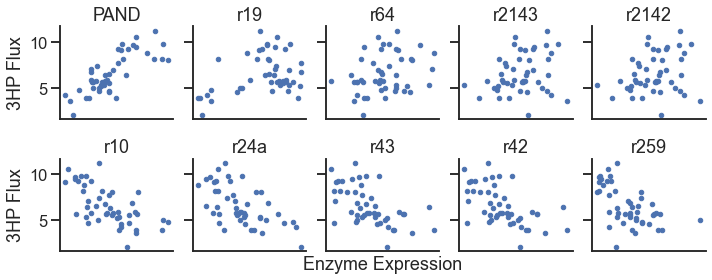

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,4), sharey=True)

for i, ax in enumerate(axs[0], start=1):
    ax.plot(df.loc[corrs.index[-i]], flux_3hp, '.')
    ax.set_title(corrs.index[-i])
    ax.xaxis.set_ticks([])
    
for i, ax in enumerate(axs[1]):
    ax.plot(df.loc[corrs.index[i]], flux_3hp, '.')
    ax.set_title(corrs.index[i])
    ax.xaxis.set_ticks([])

plt.tight_layout()
sns.despine()

axs[1, 2].set_xlabel('Enzyme Expression')
axs[0,0].set_ylabel('3HP Flux')
axs[1,0].set_ylabel('3HP Flux')
plt.tight_layout()

plt.savefig('../figures/A.niger_correlation.svg')

In [10]:
axs[1]

array([<AxesSubplot:title={'center':'r39'}, ylabel='3HP Flux'>,
       <AxesSubplot:title={'center':'r56a'}>,
       <AxesSubplot:title={'center':'r42'}, xlabel='Enzyme Expression'>,
       <AxesSubplot:title={'center':'r43'}>,
       <AxesSubplot:title={'center':'r472'}>], dtype=object)

In [11]:
plt.plot(grouped['ureG'], data['vn']['DM_ccmuac_c'], '.')

NameError: name 'grouped' is not defined